# **Overview**
 Para resolver esse desafio técnico, irei utilizar o framework **CRISP-DM** para garantir que a análise seja estruturada, repetível e orientada a resultados. Seguindo os passos:

1. Definir o problema de negócio.

2. Coletar os dados e obter uma visão geral deles.

3. Dividir os dados em conjuntos de treino e teste.

4. Explorar os dados (análise exploratória de dados).

5. Engenharia de features, limpeza e pré-processamento dos dados.

6. Treinamento de modelos, comparação, seleção de features e ajuste de hiperparâmetros.

7. Teste e avaliação do modelo final de produção.

8. Concluir e interpretar os resultados do modelo.

9. Deploy do modelo.

### **Importar Bibliotecas**

In [25]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Importing Dataset Splitting, Cross Validation and Grid Search w/ Cross validation libraries
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# Importing Feature Scalling libraries
from sklearn.preprocessing import StandardScaler, normalize

# Importing Machine Learning Models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importing Metrics libraries
from sklearn.metrics import confusion_matrix

# Importing Metric Plots libraries
from sklearn.metrics import classification_report

# Importing Balancing libraries
from imblearn.over_sampling import SMOTE

# Importing Balancing libraries
from imblearn.over_sampling import SMOTE

# Utils
import sys
sys.path.append('../src')
from utils import *

# Debugging.
# from src.exception import CustomException # Removed the problematic import
import sys

# Warning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', module='matplotlib')

# Formatação de Números Decimais
pd.options.display.float_format = '{:.2f}'.format

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot')

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33', '#8ecae6', '#ffb703']
palette_Churn = color_palette[0:2]
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2),
 (0.5568627450980392, 0.792156862745098, 0.9019607843137255),
 (1.0, 0.7176470588235294, 0.011764705882352941)]

**Lendo o Dataset**

In [26]:
data_path = '../data/02_processed/df_merged.csv'
df = pd.read_csv(data_path)

In [27]:
df.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NPS,gender,SeniorCitizen,Partner,Dependents
0,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Bank transfer (automatic),118.75,8672.45,No,9,Female,0,Yes,Yes
1,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Electronic check,118.65,8477.60,No,9,Female,0,No,No
2,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,No,Mailed check,118.60,7990.05,No,9,Female,0,Yes,No
3,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Electronic check,118.60,7365.70,No,8,Female,0,No,No
4,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Bank transfer (automatic),118.35,7804.15,Yes,9,Male,0,No,No


In [28]:
df.columns

Index(['tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'NPS',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

# **5. Feature engineering, data cleaning and preprocessing**

Novamente, não tratarei de questões como multicolinearidade porque o foco é construir modelos robustos como o LightGBM, tentando alcançar o máximo poder preditivo.

In [29]:
internetservice = pd.get_dummies(df['InternetService'], prefix='InternetService', dtype=int).drop('InternetService_No', axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
for i in ['DeviceProtection','TechSupport','OnlineSecurity','OnlineBackup','StreamingTV','StreamingMovies']:
  internetservice = pd.concat([internetservice,pd.get_dummies(df[i],prefix=i, dtype=int).drop('{}_No internet service'.format(i),axis=1)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
2,0,1,0,1,0,1,0,1,0,1,0,1,0,1
3,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,0,1,0,1,0,1,0,1,0,1,0,1,0,1


In [31]:
for i in ['gender','Partner','Dependents','PhoneService','Contract','PaperlessBilling','PaymentMethod']:
  internetservice = pd.concat([internetservice,pd.get_dummies(df[i],prefix=i,drop_first=True, dtype=int)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,...,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,1,0,1,...,0,1,1,1,0,1,1,0,0,0
1,0,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,1,1,0,1,0
2,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,0,1,0,1,0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
4,0,1,0,1,0,1,0,1,0,1,...,1,0,0,1,1,0,1,0,0,0


In [32]:
internetservice = pd.concat([internetservice,pd.get_dummies(df['MultipleLines'],prefix='MultiLines').drop('MultiLines_No phone service',axis=1)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,...,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultiLines_No,MultiLines_Yes
0,0,1,0,1,0,1,0,1,0,1,...,1,1,0,1,1,0,0,0,False,True
1,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,False,True
2,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,1,False,True
3,0,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,False,True
4,0,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,0,0,False,True


In [33]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [34]:
internetservice = pd.concat([internetservice,df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']]],axis=1)
internetservice.columns

Index(['InternetService_DSL', 'InternetService_Fiber optic',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultiLines_No', 'MultiLines_Yes', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(internetservice.drop('Churn',axis=1),
                                                    internetservice['Churn'])

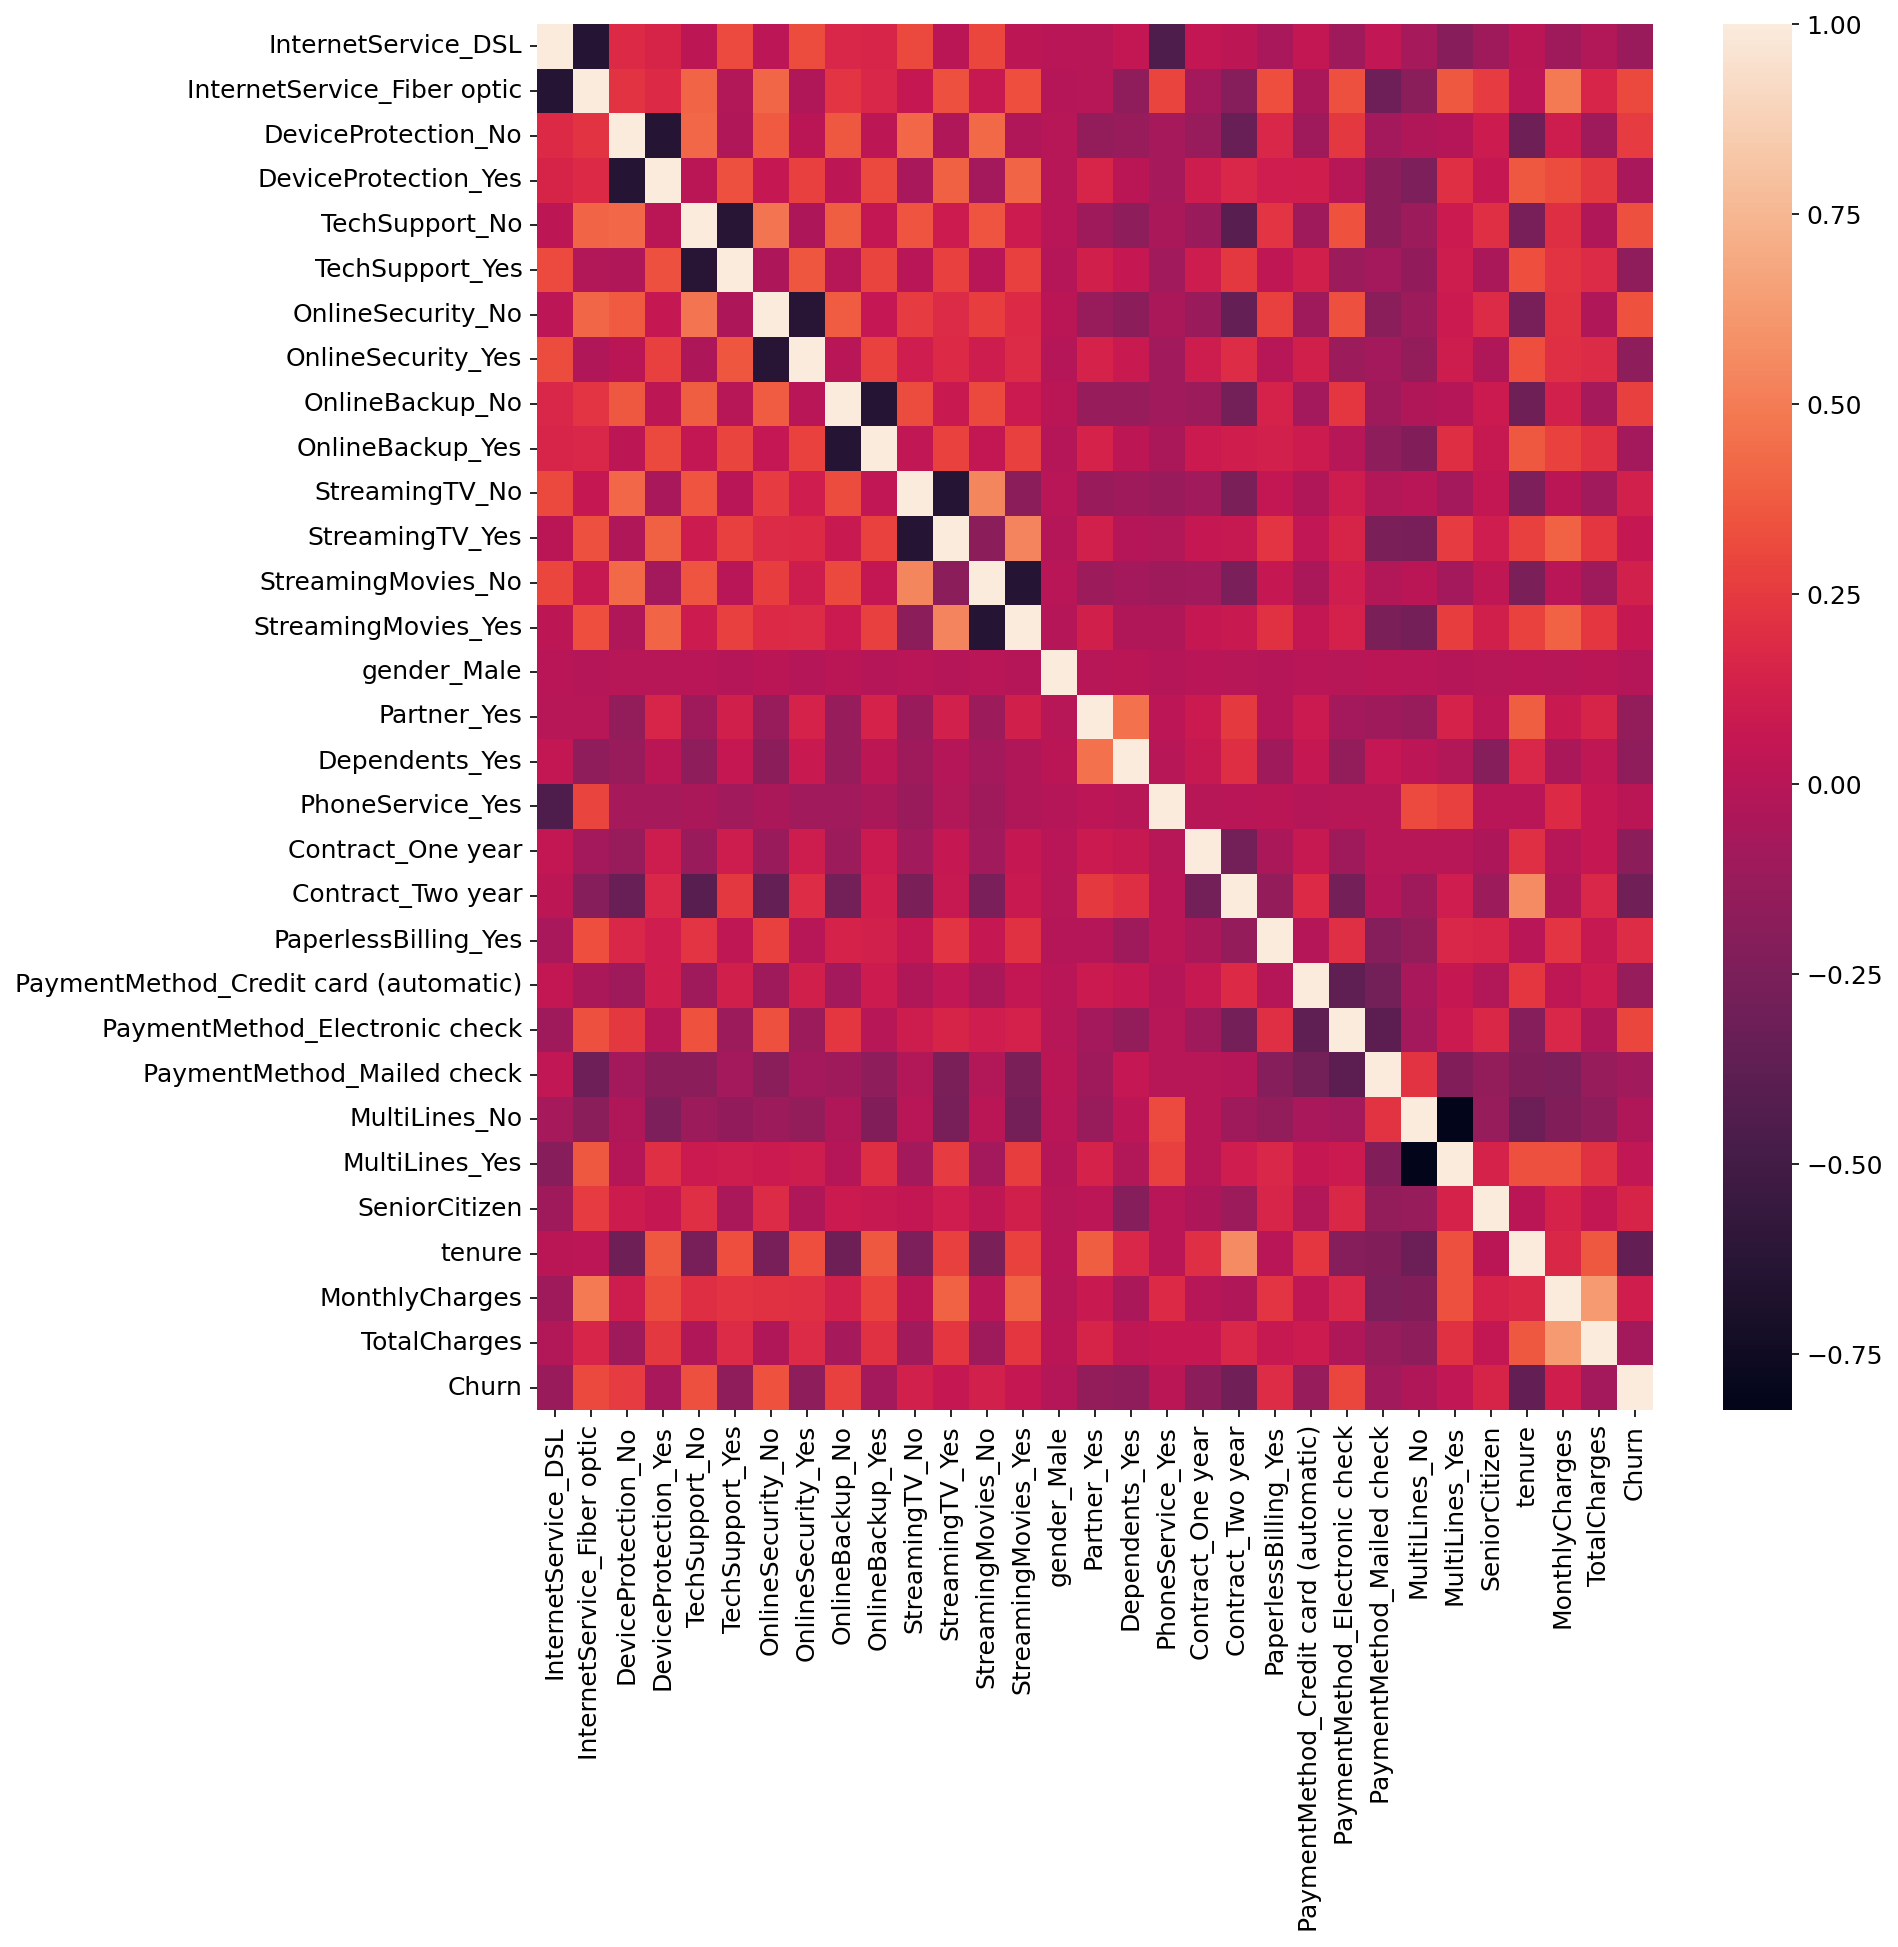

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(internetservice.corr())
plt.show()

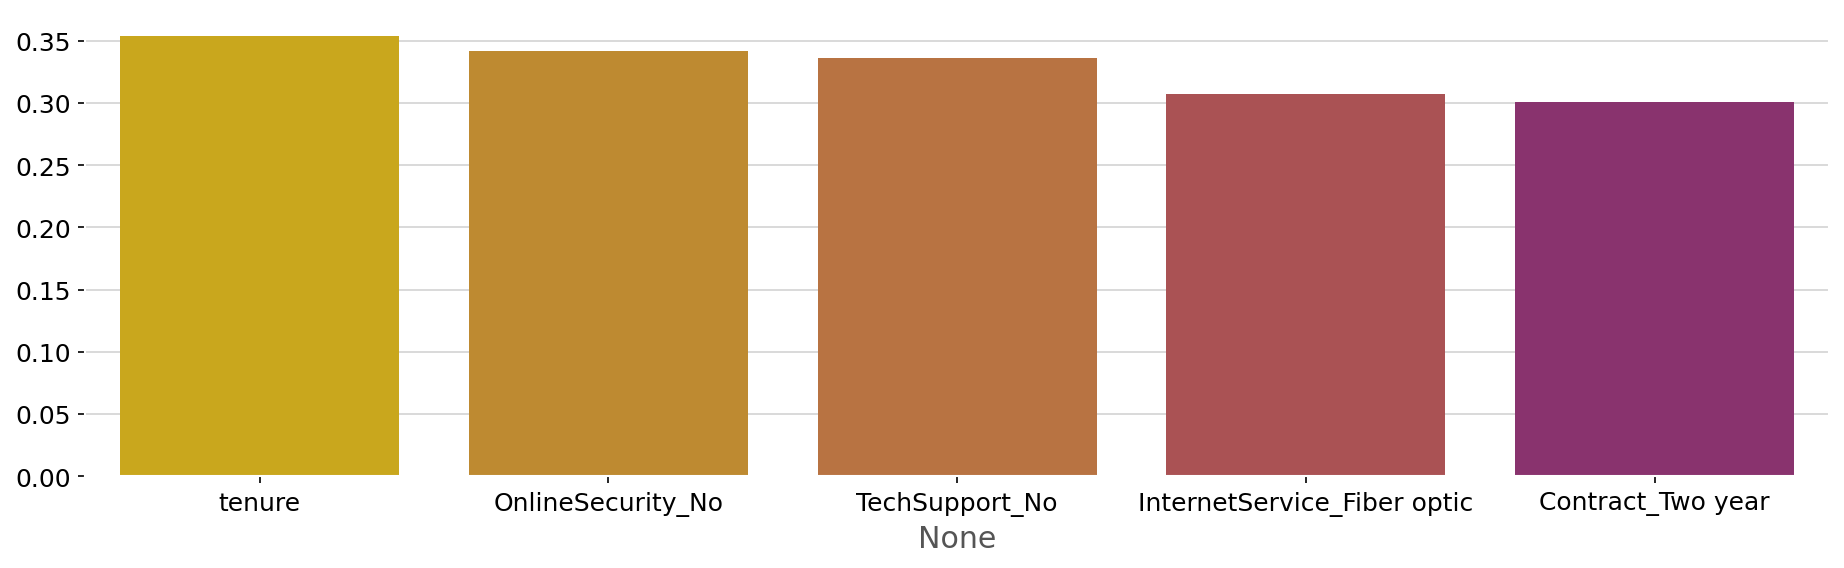

In [37]:
top_corr = abs(internetservice.corr()['Churn']).sort_values(ascending=False)[1:6]

plt.figure(figsize=(15,4))
sns.barplot(y=top_corr.values,x=top_corr.index,palette=sns.color_palette(["#E6B800","#D69019","#CC6F2E","#B84446","#972573"]))
plt.show()

In [38]:
tail_corr = abs(internetservice.corr()['Churn']).sort_values(ascending=False)[-10:]
tail_corr

PaymentMethod_Mailed check   0.09
TotalCharges                 0.09
OnlineBackup_Yes             0.08
DeviceProtection_Yes         0.07
StreamingTV_Yes              0.06
StreamingMovies_Yes          0.06
MultiLines_Yes               0.04
MultiLines_No                0.03
PhoneService_Yes             0.01
gender_Male                  0.01
Name: Churn, dtype: float64

In [39]:
sc = StandardScaler()

In [40]:
X_train[['tenure','MonthlyCharges','TotalCharges']] = sc.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultiLines_No,MultiLines_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6588,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,True,False,0,-1.19,-1.06,-0.43
4840,1,0,1,0,0,1,1,0,1,0,...,0,0,0,1,True,False,0,-1.27,-0.39,-0.43
6085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,True,False,0,-0.74,-1.04,-0.39
2321,0,1,0,1,1,0,1,0,0,1,...,1,0,1,0,False,True,1,0.78,0.41,0.30
2154,1,0,0,1,0,1,0,1,1,0,...,1,0,0,1,False,True,0,1.43,0.43,0.58


In [41]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultiLines_No,MultiLines_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
648,0,1,0,1,1,0,1,0,0,1,...,1,0,0,0,False,True,0,1.64,0.85,0.87
3191,1,0,0,1,0,1,1,0,0,1,...,0,0,0,0,False,True,0,1.02,0.19,0.34
1286,0,1,1,0,0,1,1,0,1,0,...,1,1,0,0,True,False,0,-0.90,0.66,-0.29
873,0,1,1,0,1,0,1,0,0,1,...,1,1,0,0,False,True,0,-1.27,0.77,-0.42
2181,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,False,True,0,0.45,0.43,0.21


# **6. Model training and comparison, feature selection and tuning.**

Balanceando os dados com dados sintéticos, pois a Classe Churn é altamente desbalanceada (Non-Churn = 73,4%, Churn 26,6%)

In [42]:
smote = SMOTE(random_state=42)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(internetservice.drop('Churn',axis=1),
                                                    internetservice['Churn'])

In [44]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [45]:
X_train = sc.fit_transform(X_train)
X_train_smote = sc.fit_transform(X_train_smote)
X_test = sc.transform(X_test)

In [46]:
print('Before SMOTE: {} lines'.format(X_train.shape[0]))
print('After SMOTE: {} lines'.format(X_train_smote.shape[0]))

Before SMOTE: 5298 lines
After SMOTE: 7722 lines


### **Criando Modelos**

**Baseline**
O modelo de referência fornecerá métricas comparativas previstas a partir dos dados de uma forma simples;
A técnica de validação cruzada (cross-validate) será utilizada em todos os modelos a serem testados;
A matriz de confusão (confusion matrix) será usada quando testarmos o modelo final com os dados de teste reservados;

In [47]:
base_classifier = DummyClassifier(random_state=1)

In [48]:
baseline = []

# Cross validating the model
cv_result = cross_validate(base_classifier, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to baseline list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  baseline.append(cv_result[i].mean())

In [49]:
# Printing the baseline metrics
baseline

[np.float64(0.4998706338939198),
 np.float64(0.04993531694695989),
 np.float64(0.1),
 np.float64(0.06660914581535807),
 np.float64(0.5)]

**Logistic Regression**

In [50]:
classifierLR = LogisticRegression(random_state = 1)

In [51]:
# Creating Logistic Regression list of metrics
logistic_regression = []

# Cross validating the model
cv_result = cross_validate(classifierLR, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Logistic Regression list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression.append(cv_result[i].mean())

In [52]:
logistic_regression

[np.float64(0.8097874173028842),
 np.float64(0.8046205878775661),
 np.float64(0.8135678997469574),
 np.float64(0.8052393826561015),
 np.float64(0.9000987921705474)]

**Random Forest**

In [53]:
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [54]:
# Creating Random Forest list of metrics
random_forest = []

# Cross validating the model
cv_result = cross_validate(classifierRF, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Random Forest list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest.append(cv_result[i].mean())

In [55]:
random_forest

[np.float64(0.8312968784561864),
 np.float64(0.8491065980929668),
 np.float64(0.7985774725201162),
 np.float64(0.8105312809838134),
 np.float64(0.9123591598074917)]

In [56]:
metrics = (pd.DataFrame([baseline,logistic_regression,random_forest],
                        index=['Baseline','Logistic Regression','Random Forest'],
                        columns=['Accuracy','Precision','Recall','F1 Score','AUROC'])*100).round(2)

metrics

,Accuracy,Precision,Recall,F1 Score,AUROC
Baseline,49.99,4.99,10.00,6.66,50.00
Logistic Regression,80.98,80.46,81.36,80.52,90.01
Random Forest,83.13,84.91,79.86,81.05,91.24


In [57]:
metrics['Recall'].sort_values(ascending=False)

Logistic Regression   81.36
Random Forest         79.86
Baseline              10.00
Name: Recall, dtype: float64